In [1]:
#predict the burned area due to forest fires

#Fine Fuel Moisture Code
#The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter 
#and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.

#Duff Moisture Code
#The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted 
#organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff 
#layers and medium-size woody material.

#Drought Code
#The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic 
#layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount 
#of smoldering in deep duff layers and large logs.

#Initial Spread Index
#The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines 
#the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats

In [3]:
ff=pd.read_csv("forestfires.csv")

In [4]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
# converting RH also to float type
ff['RH']=ff.RH.astype(float)

In [7]:
#check for any null/missing values
ff.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [8]:
#checking sample of data
ff.sample(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
87,1,2,sep,thu,92.9,137.0,706.4,9.2,22.4,34.0,2.2,0.0,0.00
381,8,6,aug,thu,90.7,194.1,643.0,6.8,16.2,63.0,2.7,0.0,16.33
54,4,3,aug,thu,91.7,114.3,661.3,6.3,17.6,45.0,3.6,0.0,0.00
400,9,5,jun,wed,93.3,49.5,297.7,14.0,28.0,34.0,4.5,0.0,8.16
122,3,4,sep,sun,92.4,124.1,680.7,8.5,22.5,42.0,5.4,0.0,0.00
13,6,5,sep,mon,90.9,126.5,686.5,7.0,21.3,42.0,2.2,0.0,0.00
196,6,5,apr,thu,81.5,9.1,55.2,2.7,5.8,54.0,5.8,0.0,10.93
39,4,4,mar,tue,88.1,25.7,67.6,3.8,14.1,43.0,2.7,0.0,0.00
382,8,6,aug,wed,95.2,217.7,690.0,18.0,28.2,29.0,1.8,0.0,5.86
20,6,4,sep,tue,91.0,129.5,692.6,7.0,18.3,40.0,2.7,0.0,0.00


In [10]:
#checking the statistics of data
ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


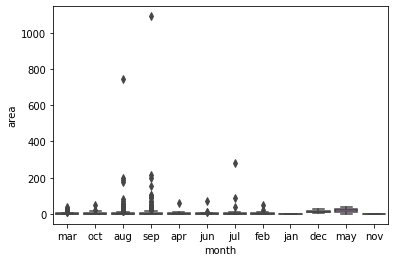

In [11]:
sns.boxplot(data=ff, x='month',y='area')

Jan and Nov reports 0.00ha forest fires with September reporting the max burned area due to fires-- along with some outliers

In [13]:
ff.groupby('month')['area'].mean() #area in ha

month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64

In [14]:
#Since Jan and Nov have no Forest fires we can remove these from the df
ff[ff['month'].isin(['jan','nov'])]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78.0,3.1,0.0,0.0
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100.0,0.9,0.0,0.0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31.0,4.5,0.0,0.0


In [15]:
ff.drop(index=[104,379,516],inplace=True)

In [16]:
#confirming
ff[ff['month'].isin(['jan','nov'])]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


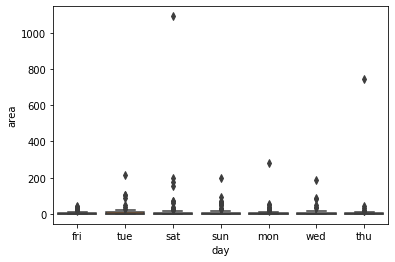

In [17]:
sns.boxplot(data=ff, x='day',y='area')

Max burned area is reached on saturdays along with some outliers


In [20]:
ff_day_area=ff.groupby('day')['area'].sum()
ff_day_area

day
fri     447.24
mon     706.53
sat    2144.86
sun     959.93
thu     997.10
tue     807.79
wed     578.60
Name: area, dtype: float64

In [21]:
# finding outliers in Area

q1,q3=np.percentile(ff['area'],[25,75])
iqr_area=q3-q1
upper_bound=q3+(1.5*iqr_area)
lower_bound=q1-(1.5*iqr_area)
print("upper_bound_area:",upper_bound)
print("lower_bound_area:",lower_bound)

upper_bound_area: 16.44375
lower_bound_area: -9.86625


In [22]:
# finding rows with outliers in area
ff[ff['area'].values> upper_bound].count()

X        63
Y        63
month    63
day      63
FFMC     63
DMC      63
DC       63
ISI      63
temp     63
RH       63
wind     63
rain     63
area     63
dtype: int64

These will be lots of rows to remove from the dataset.The Area has highly skewed data

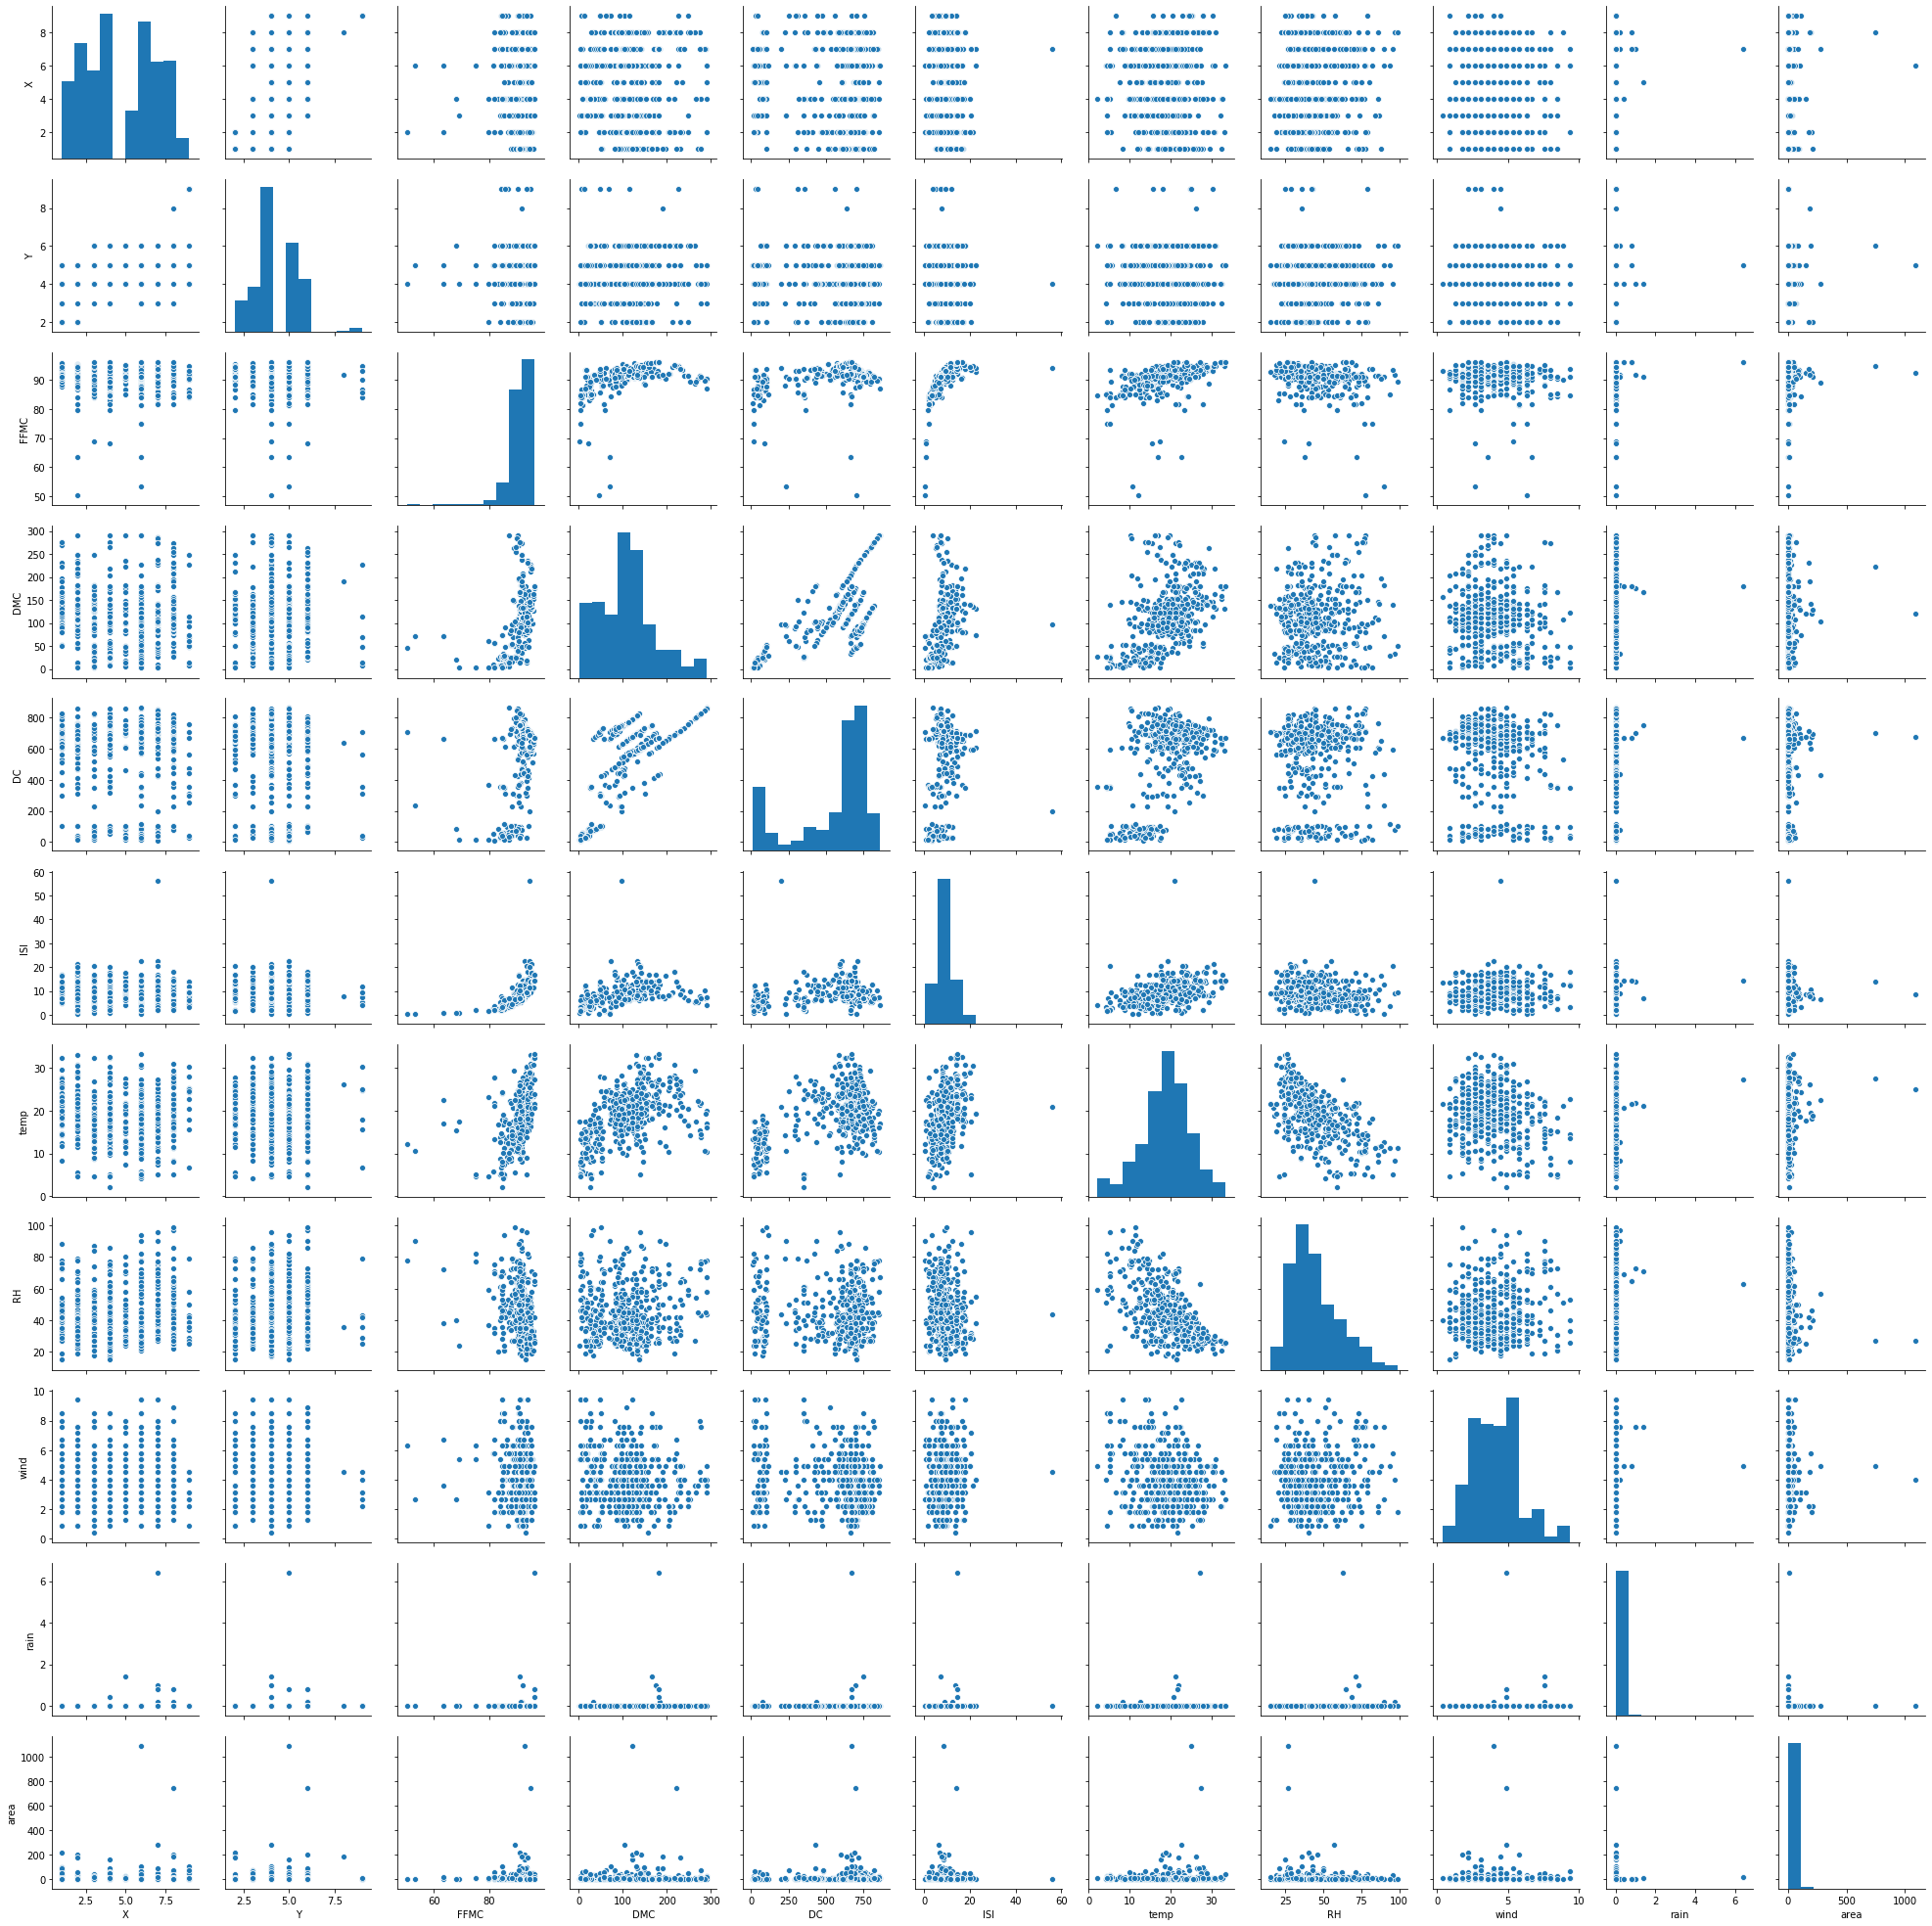

In [23]:
sns.pairplot(ff)

Data is highly skewed for Area,Rain,FFMC

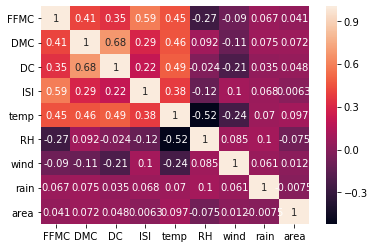

In [24]:
sns.heatmap(ff.iloc[:,4:13].corr(),annot=True)

FFMC,DMC,DC,ISI,temp have higher coorelation than others

In [25]:
# correation among the variables
ff.corr()['area'].sort_values()

RH     -0.074909
rain   -0.007453
ISI     0.006322
wind    0.011576
FFMC    0.041440
Y       0.044656
DC      0.047714
X       0.063158
DMC     0.071608
temp    0.096714
area    1.000000
Name: area, dtype: float64

Area is positivily coorelated more to temp and DMC and negatively to RH

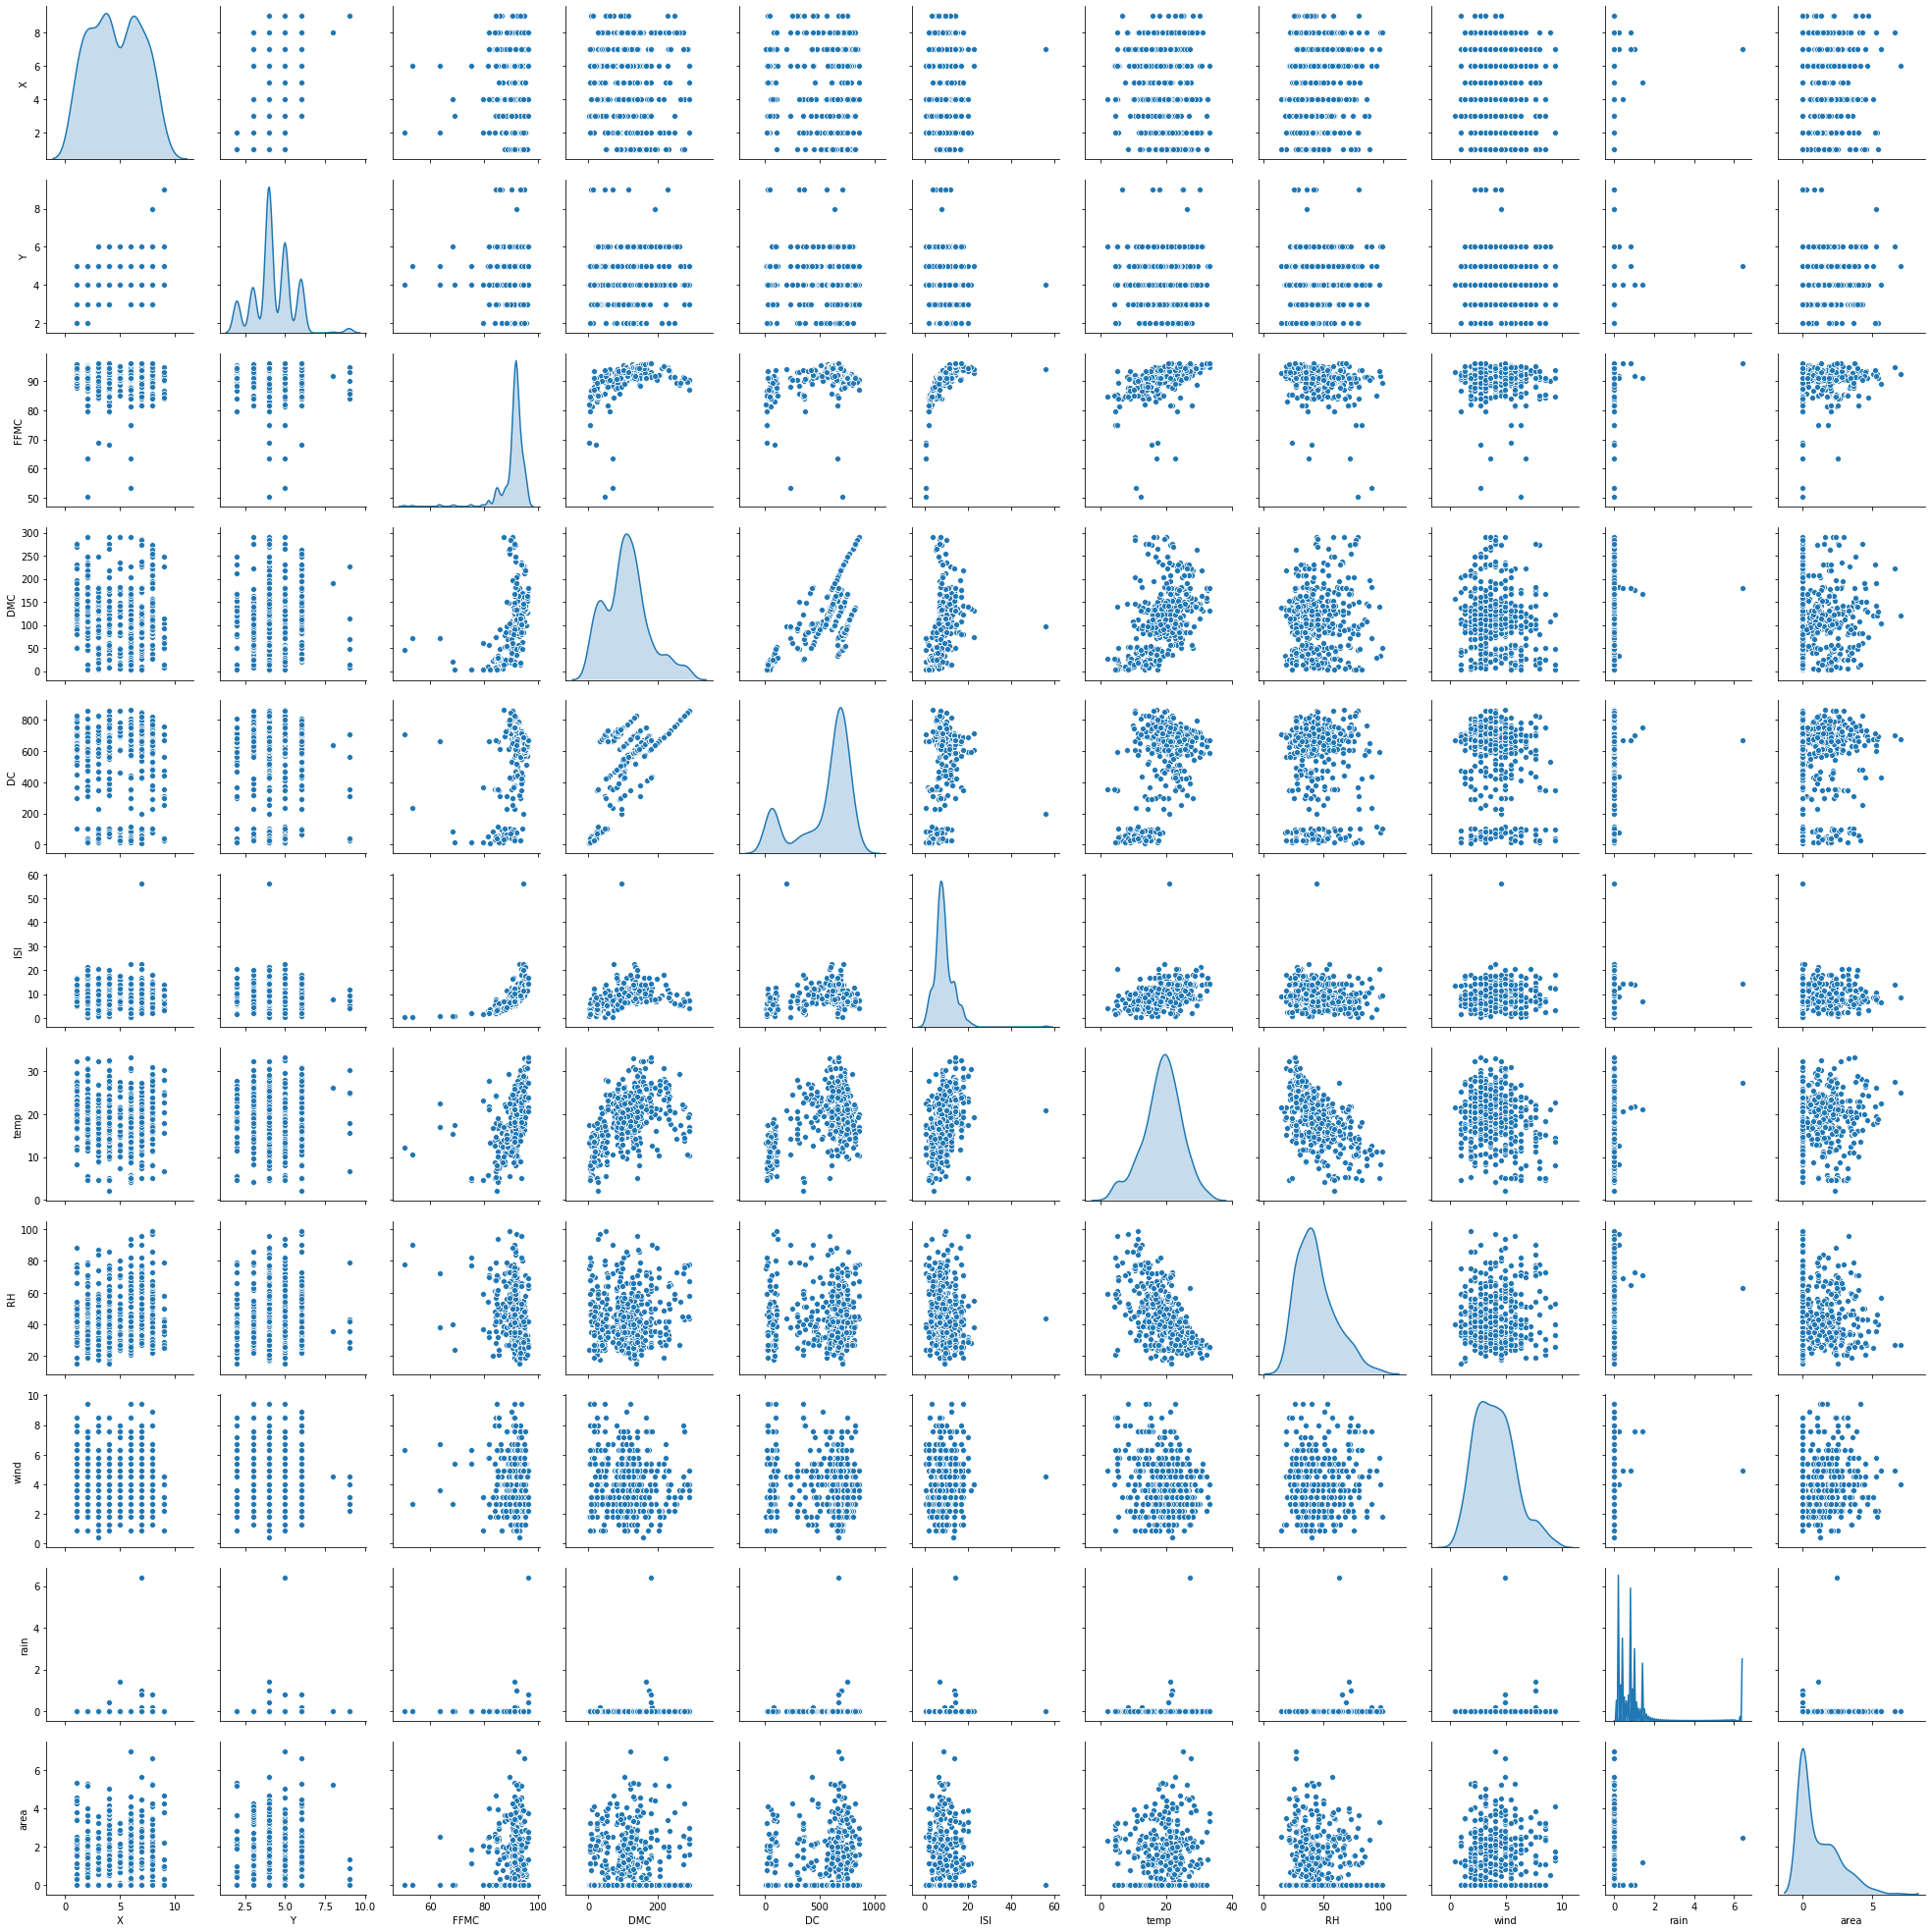

In [105]:
sns.pairplot(ff, diag_kind='kde')

Area plot is still right skewed but better than before

In [115]:
ff['area']=ff.iloc[:,12].apply(np.expm1)

### Training data

Dividing the dataset into sets
Set1: Full dataset without Area transformtaion
Set2: Full dataset with Area log transformation
Set3: Removing X,Y,month,day without Area transformation
Set4: Removing X,Y,month,day with Area log transformation
Set5: Keeping only weather fetaures- temp,RH,wind,rain with Area log transformation

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge,RidgeCV

from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [55]:
# numeric_features=['FFMC','DMC','DC','ISI','temp','RH','wind','rain']
# numeric_transformer=Pipeline(steps=[
#     ('scaler', RobustScaler())
#      ])

# categ_features=['month','day']
# categ_transformer=Pipeline(steps=[
#     ('onehot',OneHotEncoder(handle_unknown='ignore'))
    
#     ])

# preprocessor=ColumnTransformer(
#     transformers=[
#        ( 'num',numeric_transformer,numeric_features),
#         ('cat',categ_transformer,categ_features)
#     ],remainder='drop')


In [63]:
   
numeric_features = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']
numeric_features2 = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']
numeric_features3 = ['temp','RH','wind','rain']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = ['month','day']
categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

column_trans = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

column_trans2 = ColumnTransformer(
    transformers=[
        ('num2', numeric_transformer, numeric_features2),
        #('cat', categorical_transformer, categorical_features)
    ])


column_trans3 = ColumnTransformer(
    transformers=[
        ('num3', numeric_transformer, numeric_features3),
        #('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[('preprocessor', column_trans),
                          ('classifier',SVR(kernel='rbf',gamma='scale',C=10,max_iter=1000)
                            )])

clf2 = Pipeline(steps=[('preprocessor', column_trans2),
                          ('classifier',SVR(kernel='rbf',gamma='scale',C=10,max_iter=1000)
                            )])

clf3 = Pipeline(steps=[('preprocessor', column_trans3),
                          ('classifier',SVR(kernel='rbf',gamma='scale',C=10,max_iter=1000)
                            )])

In [67]:
def models_train(X_train, X_test, y_train, y_test, clf):
    
    
    clfs=[]
    clfs.append(LinearRegression())
    clfs.append(RidgeCV())
    clfs.append(ElasticNet())
    clfs.append(SVR(kernel='rbf',gamma='scale',verbose=True))
    for c in clfs:
                 clf.set_params(classifier=c)
                 clf.fit(X_train, y_train)
                 y_test_pred=clf.predict(X_test)
                 print("----------------------")
                 print(c)
                 print("Test MAE::", mean_absolute_error(y_test,y_test_pred))
                 print("Test MSE::",(mean_squared_error(y_test,y_test_pred)))

                 print("Test R^2 score::",(r2_score(y_test,y_test_pred)))

            

### SET1

### Testing the below Classifiers
Linear Regression 
Ridge Regression 
ElasticNet Regression
SVR


In [68]:

X = ff.drop(['area'], axis=1)
y = ff['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models_train(X_train, X_test, y_train, y_test,clf)
             
            
            


----------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Test MAE:: 24.061937357492855
Test MSE:: 11328.490446170152
Test R^2 score:: 0.021141988229075648
----------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
Test MAE:: 23.375680631394367
Test MSE:: 11437.45408750315
Test R^2 score:: 0.011726794402735163
----------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test MAE:: 23.16090618431305
Test MSE:: 11608.676797604812
Test R^2 score:: -0.0030680030485708
[LibSVM]----------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
Test MA

### SET2

In [69]:


X = ff.drop(['area'], axis=1)
y = ff['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=np.log1p(y_train)

models_train(X_train, X_test, y_train, y_test,clf)
             

----------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Test MAE:: 18.23383429840472
Test MSE:: 11850.50223411751
Test R^2 score:: -0.023963352442671226
----------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
Test MAE:: 18.22476025135097
Test MSE:: 11853.29573231206
Test R^2 score:: -0.02420472953537378
----------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test MAE:: 18.24712904746396
Test MSE:: 11863.018430020871
Test R^2 score:: -0.025044836219800803
[LibSVM]----------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
Test MA

### SET3

In [70]:


X = ff.drop(['X','Y','month','day','area'], axis=1)
y = ff['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#y_train=np.log1p(y_train)

models_train(X_train, X_test, y_train, y_test,clf2)

----------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Test MAE:: 24.032289128221507
Test MSE:: 11593.81350308803
Test R^2 score:: -0.00178371411456002
----------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
Test MAE:: 23.048877570659116
Test MSE:: 11540.308048920242
Test R^2 score:: 0.0028395181452409712
----------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test MAE:: 23.1836880741781
Test MSE:: 11610.443175725344
Test R^2 score:: -0.003220630036545602
[LibSVM]----------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
Test 

### SET4

In [71]:

X = ff.drop(['X','Y','month','day','area'], axis=1)
y = ff['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=np.log1p(y_train)

models_train(X_train, X_test, y_train, y_test,clf2)

----------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Test MAE:: 18.262082121388403
Test MSE:: 11860.207844839428
Test R^2 score:: -0.02480198269613898
----------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
Test MAE:: 18.236295249783975
Test MSE:: 11860.82507776511
Test R^2 score:: -0.02485531578560085
----------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test MAE:: 18.24712904746396
Test MSE:: 11863.018430020871
Test R^2 score:: -0.025044836219800803
[LibSVM]----------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
Test 

### SET5

In [72]:
X = ff.drop(['X','Y','month','day','FFMC','DMC','DC','ISI','area'], axis=1)
y = ff['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=np.log1p(y_train)

models_train(X_train, X_test, y_train, y_test,clf3)
             
            
            

----------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Test MAE:: 18.292357050135376
Test MSE:: 11861.175607385288
Test R^2 score:: -0.02488560390992811
----------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
Test MAE:: 18.253106040934075
Test MSE:: 11861.264017584053
Test R^2 score:: -0.024893243147635635
----------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test MAE:: 18.24712904746396
Test MSE:: 11863.018430020871
Test R^2 score:: -0.025044836219800803
[LibSVM]----------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
Tes

In [73]:
# All the above sets have performed poorly. 
#Lets see the Area outliers again

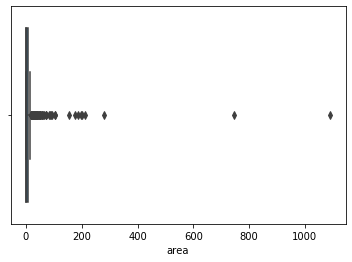

In [75]:
sns.boxplot(ff['area'])

In [98]:
area_g100=ff[ff['area']> 100]
area_g100

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
232,6,4,sep,tue,91.0,129.5,692.6,7.0,18.7,43.0,2.7,0.0,103.39
233,9,4,sep,tue,84.4,73.4,671.9,3.2,24.3,36.0,3.1,0.0,105.66
234,4,5,sep,sat,92.5,121.1,674.4,8.6,17.7,25.0,3.1,0.0,154.88
235,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41.0,5.8,0.0,196.48
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46.0,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40.0,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27.0,4.0,0.0,1090.84
377,2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42.0,2.2,0.0,174.63
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27.0,4.9,0.0,746.28
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36.0,4.5,0.0,185.76


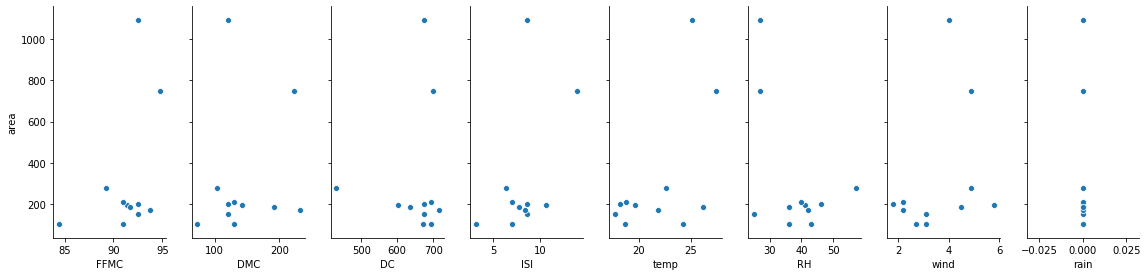

In [97]:
sns.pairplot(data=area_g100, x_vars=['FFMC','DMC','DC','ISI','temp','RH','wind','rain'], y_vars='area',height=4 ,aspect=0.5)

In [99]:
# Area 746.28 and 1090.84 are extremes in the dataset due to which the distribution is getting distorted.
# creating a set of data without these


In [102]:
ff_new=ff[ff['area']< 600]
ff_new

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.00


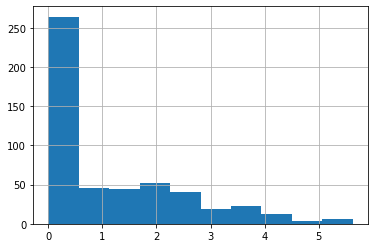

In [107]:
#ff_new['area'].hist()
np.log1p(ff_new['area']).hist()

In [114]:
# running the models again with new dataset ff_new

X = ff_new.drop(['X','Y','month','day','area'], axis=1)
y = ff_new['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#y_train=np.log1p(y_train)

models_train(X_train, X_test, y_train, y_test,clf2)
             
          

----------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Test MAE:: 12.042859473443748
Test MSE:: 324.31666184119814
Test R^2 score:: -0.4121436003158294
----------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
Test MAE:: 11.032135008160704
Test MSE:: 243.48554409147687
Test R^2 score:: -0.060187752630965985
----------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Test MAE:: 11.053487074797639
Test MSE:: 244.64388242439924
Test R^2 score:: -0.06523140365570979
[LibSVM]----------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
Test

In [59]:
preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names()

array(['x0_apr', 'x0_aug', 'x0_dec', 'x0_feb', 'x0_jul', 'x0_jun',
       'x0_mar', 'x0_may', 'x0_oct', 'x0_sep', 'x1_fri', 'x1_mon',
       'x1_sat', 'x1_sun', 'x1_thu', 'x1_tue', 'x1_wed'], dtype=object)

In [ ]:


clf.fit(X_train, y_train)
#print("model score: %.3f" % clf.score(X_test, y_test))

In [140]:
clf.named_steps.preprocessor.transformers_

[('num', Pipeline(memory=None,
           steps=[('scaler',
                   RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                                with_centering=True, with_scaling=True))],
           verbose=False), ['temp', 'RH', 'wind', 'rain']),
 ('cat', Pipeline(memory=None,
           steps=[('onehot',
                   OneHotEncoder(categorical_features=None, categories=None,
                                 drop=None, dtype=<class 'numpy.float64'>,
                                 handle_unknown='ignore', n_values=None,
                                 sparse=True))],
           verbose=False), ['month', 'day']),
 ('remainder', 'passthrough', [0, 1, 4, 5, 6, 7])]

In [99]:
np.expm1(y_test)


375    39.35
91      0.00
171     2.69
182     6.38
199    11.32
       ...  
390     9.96
98      0.00
159     1.69
310     0.00
474    10.08
Name: area_log, Length: 130, dtype: float64

In [141]:
clf.score(X_test,y_test)

-0.22979474368751385